# Zero to Hero

## 1.07 Aplicando el arbol

Se aplicará el modelo generado por rpart a los datos nuevos y se genera la salida para Kaggle

In [1]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

options(repr.plot.width=20, repr.plot.height=10) 
setwd("M:\\")  #Aqui se debe poner la ruta de la PC local

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,556773,29.8,1176414,62.9,1106347,59.1
Vcells,1018350,7.8,8388608,64.0,1651441,12.6


In [2]:
dtrain <- data.table::fread("./datasetsOri/paquete_premium_202011.csv")   #cargo el dataset

In [3]:
#genero el modelo
modelo <-  rpart::rpart(formula= "clase_ternaria ~ ." ,
                        data= dtrain,
                        xval= 0,
                        cp= -1,
                        maxdepth= 2 )

Cargo el dataset a donde voy a aplicar el modelo

In [4]:
dapply <- data.table::fread("./datasetsOri/paquete_premium_202101.csv")   #cargo el dataset

Aplico el modelo a los datos dapply  pidiendo que me devuelva probabildades

In [5]:
prediccion  <- predict( modelo, dapply, type = "prob")

Analizo que queda en prediccion

In [6]:
head( prediccion )

,BAJA+1,BAJA+2,CONTINUA
1,0.0009687193,0.001388827,0.9976425
2,0.0009687193,0.001388827,0.9976425
3,0.0009687193,0.001388827,0.9976425
4,0.0009687193,0.001388827,0.9976425
5,0.0009687193,0.001388827,0.9976425
6,0.0088117634,0.010109201,0.9810790


Prediccion es una matriz; me interesa la columna "BAJA+2"  que es la probabilidad que modelo asigna a cada registro de dapply

In [7]:
prob_baja2  <- prediccion[, "BAJA+2"]

In [8]:
head( prob_baja2)

1           2           3           4           5           6 
0.001388827 0.001388827 0.001388827 0.001388827 0.001388827 0.010109201

prob_baja2 es el vector de probabilidades

In [10]:
length( prob_baja2 )
nrow( dapply )

[1] 240336

[1] 240336

Ahora decido si envio el estimulo o no
<br>
si prob( BAJA+2) > 0.025  envio  el estímulo

In [11]:
Predicted   <- ifelse( prob_baja2 > 0.025, 1, 0 )

In [12]:
head( Predicted)

1 2 3 4 5 6 
0 0 0 0 0 0

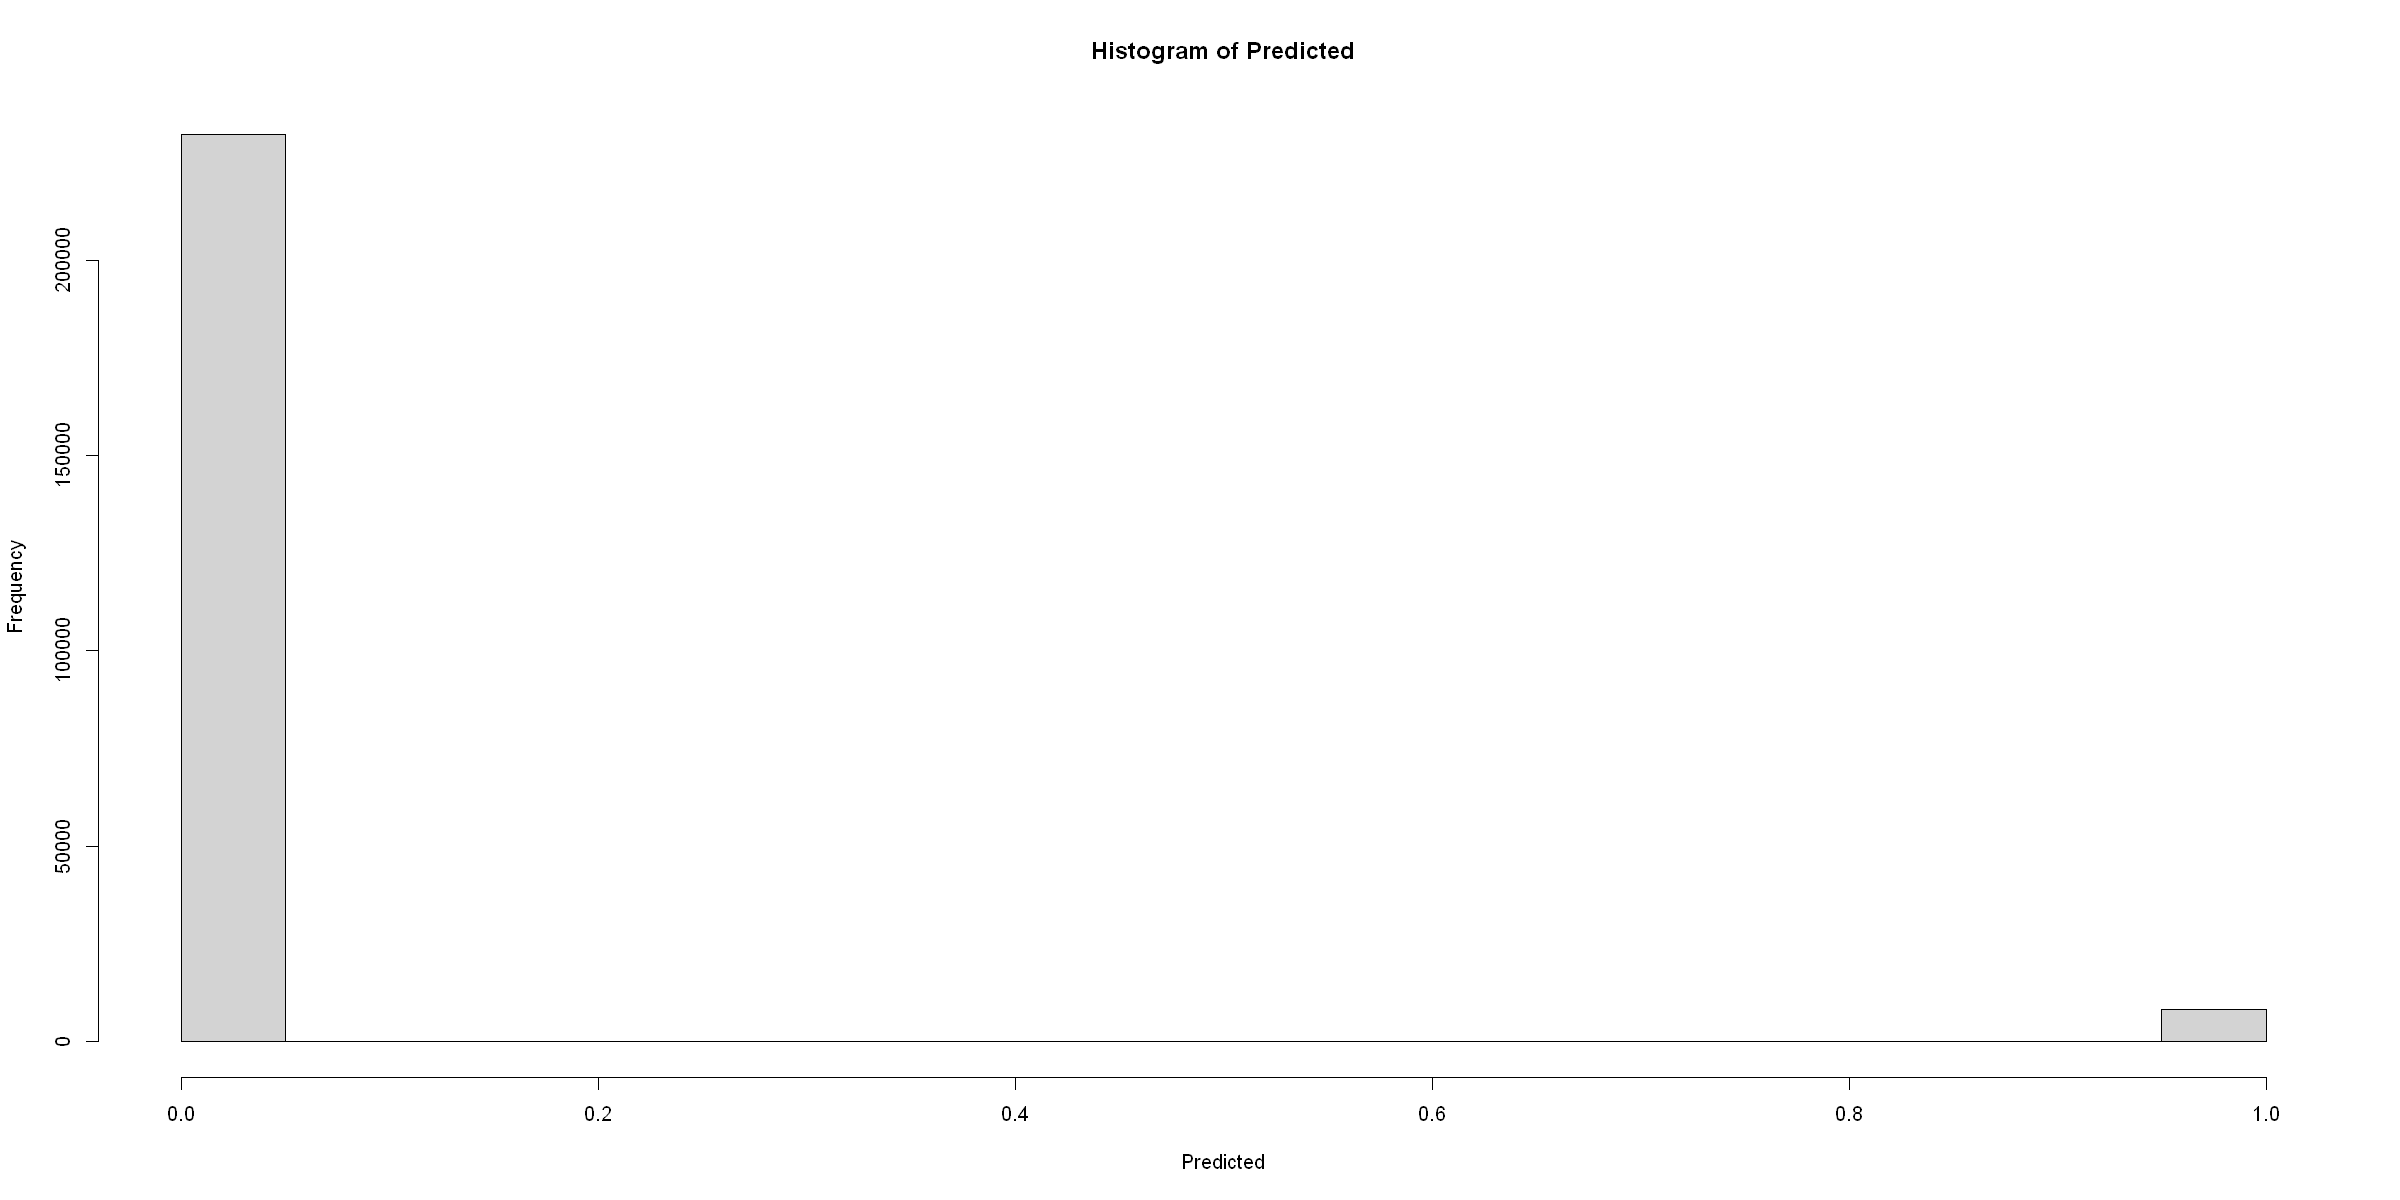

In [13]:
hist( Predicted)

creo una tabla con  lo que voy a enviar a Kaggle

In [14]:
entrega  <-  as.data.table( list( "numero_de_cliente"=dapply$numero_de_cliente, "Predicted"=Predicted)  )

In [15]:
head( entrega)

numero_de_cliente,Predicted
<int>,<dbl>
4572266,0
4572285,0
4572379,0
4572571,0
4572624,0
4572759,0


In [16]:
entrega[ , .N, Predicted]

Predicted,N
<dbl>,<int>
0,232179
1,8157


Esto significa que se enviaran 8157 estímulos

In [17]:
#genero el archivo para Kaggle
fwrite( entrega, 
        file= "./kaggle/para_Kaggle_0107.csv",
        sep=  "," )

Subiendo a Kaggle la prediccion anterior se obtiene en el Public Leaderboard 14.58786